Importaciones

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re


In [2]:
df = pd.read_csv('archivo_final.csv')
df.head()  # muestra las primeras filas del DataFrame
df.describe()  # proporciona estadísticas descriptivas para las columnas numéricas
df.info()  # muestra información sobre el DataFrame, incluyendo los tipos de datos y la cantidad de valores no nulos


C:\Users\Jose\AppData\Local\Temp\ipykernel_4676\1091381712.py:1: DtypeWarning: Columns (16,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('archivo_final.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753177 entries, 0 to 753176
Data columns (total 30 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DEPREG    753177 non-null  int64  
 1   MUPREG    753177 non-null  int64  
 2   MESREG    753177 non-null  int64  
 3   AÑOREG    753177 non-null  int64  
 4   CLAUNI    753177 non-null  int64  
 5   EDADHOM   753177 non-null  int64  
 6   EDADMUJ   753177 non-null  int64  
 7   GETHOM    297767 non-null  float64
 8   GETMUJ    297767 non-null  float64
 9   NACHOM    753177 non-null  int64  
 10  NACMUJ    753177 non-null  int64  
 11  OCUHOM    297767 non-null  float64
 12  OCUMUJ    297767 non-null  float64
 13  NUPHON    62104 non-null   float64
 14  NUPMUJ    62104 non-null   float64
 15  DEPOCU    753177 non-null  int64  
 16  MUPOCU    753177 non-null  object 
 17  MESOCU    753177 non-null  int64  
 18  AÑOOCU    508678 non-null  float64
 19  AREAG     297767 non-null  float64
 20  ESCH

In [5]:
# reemplazar valores faltantes
df.fillna(0, inplace=True)

# eliminar filas duplicadas
df.drop_duplicates(inplace=True)

# reemplazar los valores que contienen el formato 1-XXX por NaN en todo el dataframe
df = df.applymap(lambda x: np.nan if isinstance(x, str) and re.match('^1-', x) else x)
df = df.applymap(lambda x: np.nan if isinstance(x, str) and re.match('^13-', x) else x)

# eliminar las filas que contienen NaN en todo el dataframe
df.dropna(inplace=True)

# reemplazar todos los valores 'NEOG' por 0
df.replace('NEOG', 0, inplace=True)

# Convertir tipos de datos
df["GETHOM"] = df["GETHOM"].astype(int)
df["GETMUJ"] = df["GETMUJ"].astype(int)
df["OCUHOM"] = df["OCUHOM"].astype(int)
df["OCUMUJ"] = df["OCUMUJ"].astype(int)
df["NUPHON"] = df["NUPHON"].astype(int)
df["NUPMUJ"] = df["NUPMUJ"].astype(int)
df["MUPOCU"] = df["MUPOCU"].astype(int)
df["AÑOOCU"] = df["AÑOOCU"].astype(int)
df["AREAG"] = df["AREAG"].astype(int)
df["ESCHOM"] = df["ESCHOM"].astype(int)
df["ESCMUJ"] = df["ESCMUJ"].astype(int)
df["DIAOCU"] = df["DIAOCU"].astype(int)

# eliminar columnas irrelevantes
df.drop(['PUEHOM', 'PUEMUJ','CIUOHOM', 'CIUOMUJ', 'AREAGOCU','NUNUHO', 'NUNUMU'], axis=1, inplace=True)

In [6]:
df.to_csv('archivo_limpio.csv', index=False)


In [7]:
df = pd.read_csv('archivo_limpio.csv')
df.head()


,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,GETHOM,GETMUJ,NACHOM,...,NUPHON,NUPMUJ,DEPOCU,MUPOCU,MESOCU,AÑOOCU,AREAG,ESCHOM,ESCMUJ,DIAOCU
0,12,1204,4,10,1,16,14,1,1,320,...,99,99,12,1204,9,9,9,0,0,0
1,11,1101,5,9,1,16,14,9,9,320,...,99,99,11,1101,3,9,9,0,0,0
2,13,1302,1,10,1,16,14,9,9,320,...,1,1,13,1302,12,9,9,0,0,0
3,14,1412,8,9,1,16,14,1,1,320,...,1,1,14,1412,7,9,9,0,0,0
4,14,1412,10,9,1,16,14,1,1,320,...,1,1,14,1412,10,9,9,0,0,0


In [8]:
df.tail()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751493 entries, 0 to 751492
Data columns (total 23 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   DEPREG   751493 non-null  int64
 1   MUPREG   751493 non-null  int64
 2   MESREG   751493 non-null  int64
 3   AÑOREG   751493 non-null  int64
 4   CLAUNI   751493 non-null  int64
 5   EDADHOM  751493 non-null  int64
 6   EDADMUJ  751493 non-null  int64
 7   GETHOM   751493 non-null  int64
 8   GETMUJ   751493 non-null  int64
 9   NACHOM   751493 non-null  int64
 10  NACMUJ   751493 non-null  int64
 11  OCUHOM   751493 non-null  int64
 12  OCUMUJ   751493 non-null  int64
 13  NUPHON   751493 non-null  int64
 14  NUPMUJ   751493 non-null  int64
 15  DEPOCU   751493 non-null  int64
 16  MUPOCU   751493 non-null  int64
 17  MESOCU   751493 non-null  int64
 18  AÑOOCU   751493 non-null  int64
 19  AREAG    751493 non-null  int64
 20  ESCHOM   751493 non-null  int64
 21  ESCMUJ   751493 non-null  int64
 

,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,GETHOM,GETMUJ,NACHOM,...,NUPHON,NUPMUJ,DEPOCU,MUPOCU,MESOCU,AÑOOCU,AREAG,ESCHOM,ESCMUJ,DIAOCU
count,751493.000000,751493.000000,751493.000000,751493.000000,751493.000000,751493.000000,751493.000000,751493.000000,751493.000000,751493.000000,...,751493.000000,751493.000000,751493.000000,751493.000000,751493.000000,751493.000000,751493.000000,751493.000000,751493.000000,751493.000000
mean,9.499703,957.456383,6.470240,1851.491023,3.006594,32.233748,29.618972,1.299258,1.370263,321.756141,...,4.425148,4.430480,9.511240,958.796345,6.658219,1196.698298,1.213534,2.863980,2.884563,14.726647
std,6.401404,640.704754,3.550853,547.249387,1.520520,56.132933,59.578843,2.565399,2.671688,35.406636,...,20.368451,20.380722,6.392711,639.596576,3.565765,988.513428,2.629115,2.116226,2.320599,9.355625
min,1.000000,101.000000,1.000000,9.000000,1.000000,12.000000,10.000000,0.000000,0.000000,8.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,401.000000,3.000000,2011.000000,3.000000,22.000000,20.000000,0.000000,0.000000,320.000000,...,0.000000,0.000000,4.000000,401.000000,3.000000,0.000000,0.000000,2.000000,1.000000,7.000000
50%,10.000000,1002.000000,6.000000,2014.000000,3.000000,26.000000,23.000000,0.000000,0.000000,320.000000,...,0.000000,0.000000,10.000000,1002.000000,7.000000,2010.000000,0.000000,2.000000,2.000000,15.000000
75%,14.000000,1413.000000,10.000000,2016.000000,3.000000,32.000000,29.000000,2.000000,2.000000,320.000000,...,0.000000,0.000000,14.000000,1414.000000,10.000000,2016.000000,1.000000,4.000000,4.000000,23.000000
max,22.000000,2217.000000,12.000000,2019.000000,9.000000,999.000000,999.000000,9.000000,9.000000,9999.000000,...,99.000000,99.000000,22.000000,2217.000000,12.000000,2018.000000,9.000000,9.000000,9.000000,31.000000


## Cantidad de matrimonios por mes

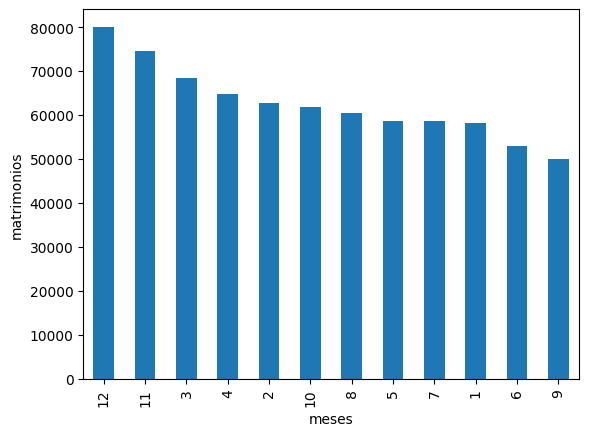

In [9]:
df['MESOCU'].value_counts().plot(kind='bar')
plt.xlabel('meses')
plt.ylabel('matrimonios')
plt.show()



## Cantidad de matrimonios por departamento

In [10]:
df['DEPOCU'].value_counts()

1     155282
13     57528
16     51615
12     50007
14     48062
9      45382
4      37250
5      36128
10     33939
8      26664
22     24402
17     22178
3      21456
7      20594
11     19159
6      18341
20     17214
18     16783
15     14412
21     14228
19     12273
2       8596
Name: DEPOCU, dtype: int64

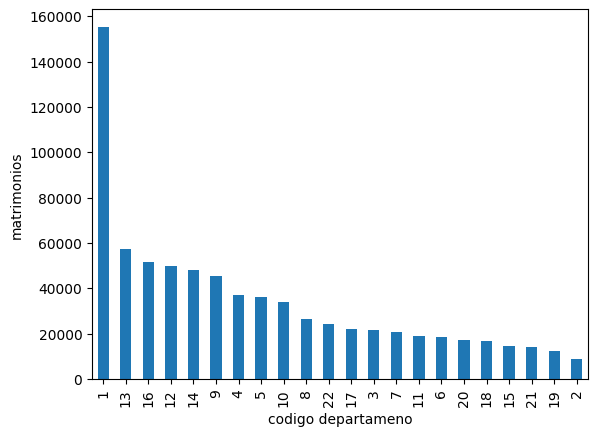

In [11]:
df['DEPOCU'].value_counts().plot(kind='bar')
plt.xlabel('codigo departameno')
plt.ylabel('matrimonios')
plt.show()


In [12]:
# Reemplazar los valores numéricos por etiquetas
df['CLAUNI'] = df['CLAUNI'].replace({1: 'Comunidad absoluta',
                                     2: 'Separación absoluta',
                                     3: 'Comunidad de gananciales',
                                     9: 'No especificado'})


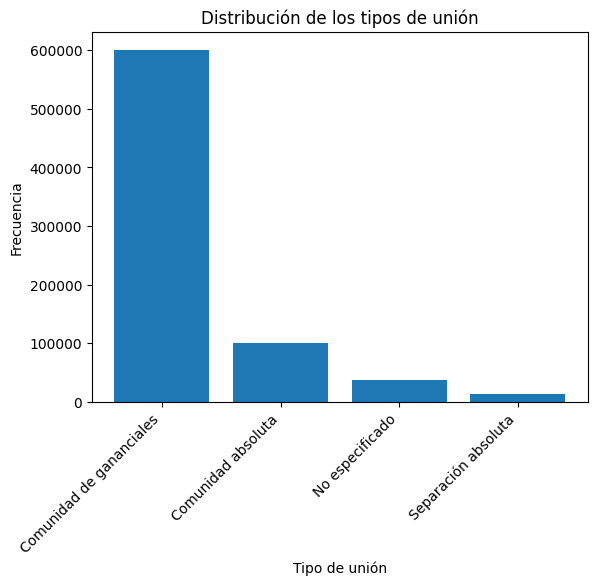

In [13]:
counts = df['CLAUNI'].value_counts()

# Crear un gráfico de barras
plt.bar(counts.index, counts.values)

# Rotar los nombres de las etiquetas
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas y título
plt.xlabel('Tipo de unión')
plt.ylabel('Frecuencia')
plt.title('Distribución de los tipos de unión')


# Mostrar la gráfica
plt.show()

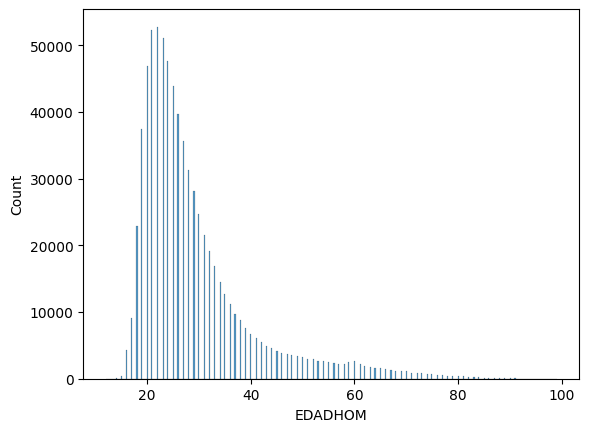

In [14]:

# Filtrar los valores que no son iguales a 999
edad_sin_999 = df.loc[df['EDADHOM'] != 999, 'EDADHOM']

# Crear una gráfica de distribución de la columna "edad" sin los valores de 999
sns.histplot(edad_sin_999)

# Mostrar la gráfica
plt.show()


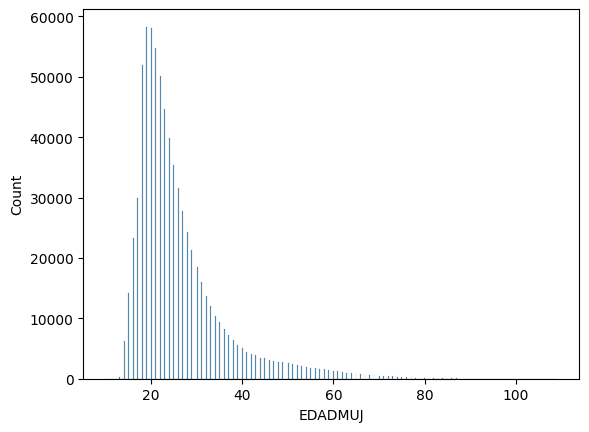

In [15]:

# Filtrar los valores que no son iguales a 999
edad_sin_999 = df.loc[df['EDADMUJ'] != 999, 'EDADMUJ']

# Crear una gráfica de distribución de la columna "edad" sin los valores de 999
sns.histplot(edad_sin_999)

# Mostrar la gráfica
plt.show()